In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
          'machine-learning-databases/wine/wine.data',
          header=None)

df_wine.head()          

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
## train test split
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,random_state=0)

## standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                                                    
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Unsupervised dimensionality reduction via principal component analysis

In [3]:
print(X_train_std.shape)
print(X_train_std.T.shape)

(124, 13)
(13, 124)


In [4]:
## cov , eig

import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)



Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


## Total and explained variance

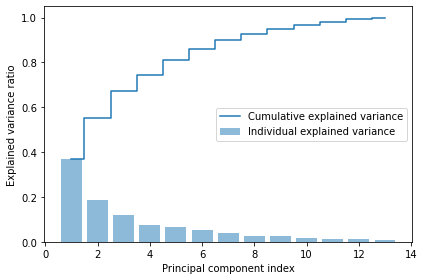

In [5]:
tot = sum(eigen_vals)
var_exp = [ (i/tot) for i in sorted(eigen_vals, reverse=True) ]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='Cumulative explained variance')        

plt.ylabel('Explained variance ratio')         
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Feature transformation

In [6]:
## make eigen pairs
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

## sort by eigen values
eigen_pairs.sort(key=lambda x : x[0], reverse=True)

print( [x[0] for x in eigen_pairs] )

[4.842745315655896, 2.4160245870352295, 1.548458248820353, 0.9612043774977376, 0.8416616104578413, 0.662063404038304, 0.5182847213561954, 0.3465037664128671, 0.31313680047208897, 0.21357214660527343, 0.18086130479496612, 0.15362835006711023, 0.10754642369670976]


In [7]:
## W : transformation matrix
## z = xW

print(eigen_pairs[0][1].shape)
print(eigen_pairs[0][1][:,np.newaxis].shape)

print(eigen_pairs[0][1].reshape(13, -1).shape)

(13,)
(13, 1)
(13, 1)


In [8]:
## make w with first two eigen vectors

w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
               eigen_pairs[1][1][:,np.newaxis]))


print(w.shape)
print('Matrix W : \n', w)               


(13, 2)
Matrix W : 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [9]:
## transform X
## z = xW

## single data
print( X_train_std[0].dot(w) )

## entire data
X_train_pca = X_train_std.dot(w)

[2.38299011 0.45458499]


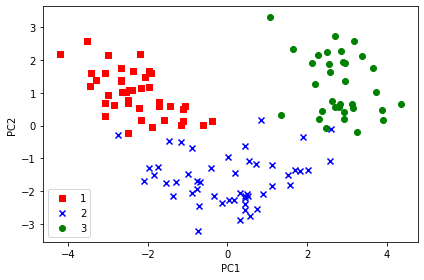

In [10]:
## plot transforms data 
## 2-dim , PC1 , PC2

color = ['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(y_train),color,markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC1')                
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


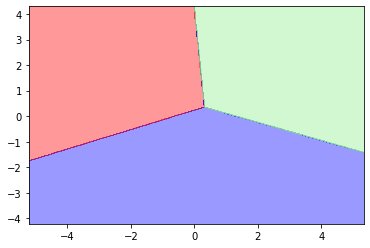

d:\my_work\Learn\ML_with_python_3rd\plot_decision_regions_script.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


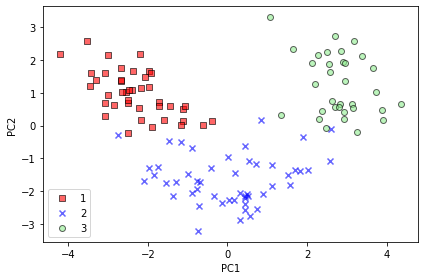

In [16]:
from plot_decision_regions_script import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')

## dimensionality reduction
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Supervised data compression via linear discriminant analysis

In [ ]:
'''
The inner workings of linear discriminant analysis
Before we dive into the code implementation, let's briefly summarize the main steps that are required to perform LDA:

Standardize the d-dimensional dataset (d is the number of features).
For each class, compute the d-dimensional mean vector.
Construct the between-class scatter matrix SB, , and the within-class scatter matrix, S_W.
Compute the eigenvectors and corresponding eigenvalues of the matrix, (S_W)-1 * S_B.
Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a d x k - dimensional transformation matrix, W; the eigenvectors are the columns of this matrix.
Project the examples onto the new feature subspace using the transformation matrix, W.
'''

In [18]:
## Computing the scatter matrices

## class mean vectors
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [19]:
## within-class scatter matrix
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += ( row - mv ).dot(( row - mv ).T)
        S_W += class_scatter
    print('Within-class scatter matrix:%sx%s' % (S_W.shape[0], S_W.shape[1]))


Within-class scatter matrix:13x13
Within-class scatter matrix:13x13
Within-class scatter matrix:13x13


In [22]:
## class imbalance , violate LDA condition

print('Class label distribution : %s' % np.bincount(y_train)[1:])

Class label distribution : [41 50 33]


In [24]:
## scaled within-class scatter matrix

d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
    print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],S_W.shape[1]))

Scaled within-class scatter matrix: 13x13
Scaled within-class scatter matrix: 13x13
Scaled within-class scatter matrix: 13x13


In [25]:
## S_B : Between-class scatter matrix

mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    print('Between-class scatter matrix : %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix : 13x13
Between-class scatter matrix : 13x13
Between-class scatter matrix : 13x13


In [26]:
## Selecting linear discriminants for the new feature subspace

eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [27]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k:k[0], reverse=True)
print('Eigenvalues in descending order:\n')

for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

4545.0315157779205
2245.8997884673195
6.268067162019089e-13
2.705662158109477e-13
2.705662158109477e-13
2.3071343407136544e-13
2.3071343407136544e-13
1.5961415907702332e-13
1.5961415907702332e-13
6.544641346588218e-14
4.7620263516007934e-14
4.7620263516007934e-14
0.0


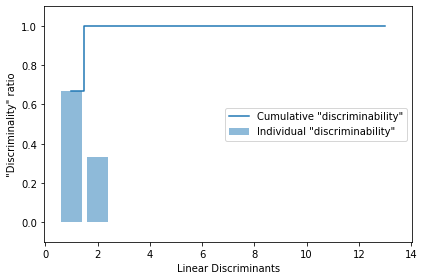

In [28]:
## class discriminatory

tot = sum(eigen_vals.real)
discr = [ (i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1,14), discr, alpha=0.5, align='center',label='Individual "discriminability"')
plt.step(range(1,14), cum_discr, where='mid',label='Cumulative "discriminability"')
plt.ylabel('"Discriminality" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
eigen_pairs[0][1][:,np.newaxis].shape

(13, 1)

In [37]:
## make transformation matrix W
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,
              eigen_pairs[1][1][:,np.newaxis].real))

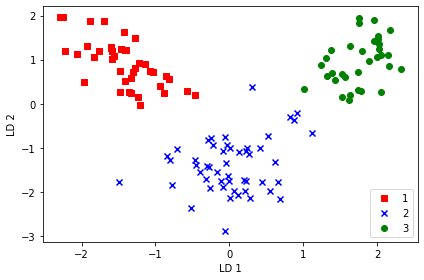

In [38]:
## Projecting examples onto the new feature space
## X_prime = XW

X_train_lda = X_train_std.dot(w)
colors = ['r','b','g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l,0],
                X_train_lda[y_train==l,1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')                
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## LDA via scikit-learn

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

d:\my_work\Learn\ML_with_python_3rd\plot_decision_regions_script.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


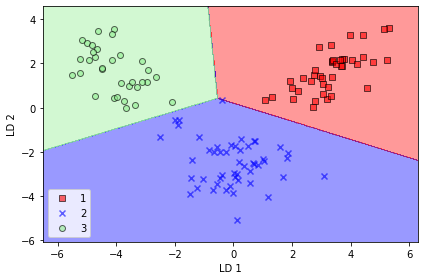

In [41]:
## LD1, LD2, classification with Logistic Regression Classifier

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

d:\my_work\Learn\ML_with_python_3rd\plot_decision_regions_script.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


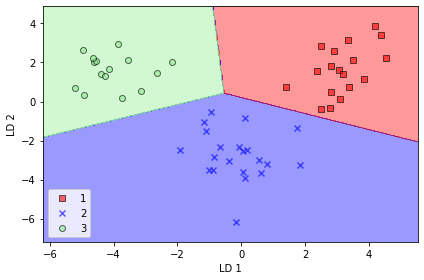

In [42]:
## result on test data
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Using KPCA(Kernel Pricipal Component Analysis) for nonlinear mappings